# Chapter 9: Principal Component Analysis

In [1]:
%reset
low_memory=False
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns; sns.set()
from scipy import stats
import math
import os
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## 9.1 Introduction & Motivation

Much like in supervised learning, unsupervised learning also has different settings.
In supervised learning we had two big tasks to perform: regression and classification problems. In unsupervised learning, we have thusfar taken a look at cluster analysis. A second interesting task which can be performed in unsupervised learning is that of dimensionality reduction.

Dimensionality reduction does exactly what it says: it reduces the amount of dimensions in our dataset without losing information that is stored within them.

This is especially interesting when working with Big Data, as storage costs of data are extremely essential is such giant orders of magnitude.

## 9.2 Problem Setting

We have already seen that in a dataset, the rows correspond to observations, and the columns correspond to variables. These variables are the dimensions of our dataset. Imagine we have a dataset of more than 100 variables. Whatever analysis we would perform, the interpretation would definitely lead to problems simply because it is extremely difficult to compare 100 factors with each other.

As such, we're looking to reduce this number of variables. The proces of reducing variables or dimensions is called *dimensionality reduction*, and we do this by performing a *Feature analysis*. In other words, we analyse our features to reduce the total amount of variables.

There are multiple ways to approach this, but the one we will be exploring today is called **Principal Component Analysis**.

The idea behind PCA is extremely straightforward. For example, consider the following scatterplot:

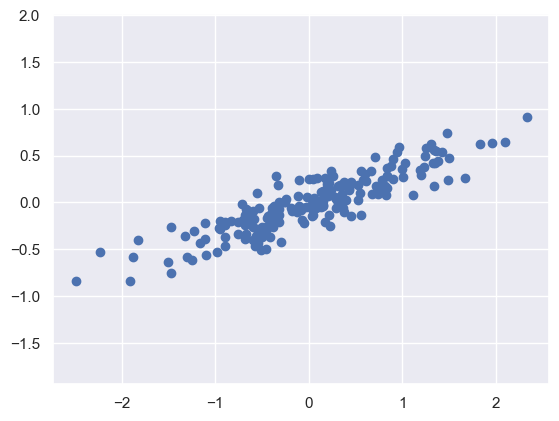

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

This is a dataset, or at least part of a dataset, in which 2 variables are shown. We saw in Chapter 2 that we can easily summarize the relationship between these two variables with a *Simple Linear Regression Model*. If we perform this analysis, then we can estimate the value of 1 of the 2 variables based upon the value of the other variable. As such, we need only 1 variable to summarize all the information contained by the 2 variables represented above. It is exactly this what PCA tries to do. PCA does not necessarily always does this by using Linear Regression, but may use different methods to summarize the information stored in several variables in 1 (or several) different variables.

## 9.3 Model

### 9.3.1 Model

Remember the dataset we have used all too often in the Supervised Setting of Classification: the handwritten digit recognition dataset. We'll use this dataset to illustrate the practice of using the PCA model. Remember, however, that PCA is a non-supervised model. So in essence, we are looking for structure in our data without knowing the labels. We will however in this example now and then compare our findings with the actual labels, in order te know where are up to any good.

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In the Digit Recognition Dataset, you might wonder what all the dimensions are. All the way in the start we looked at this, but let's repeat it to be clear.

The dataset consists of pictures, and labels belonging to said pictures. The pictures themselves are the independent variables in which we try to find some kind of structure. Each picture consists of 64 pixels, of which each pixel has some kind of value representing to which color is represented in said pixel. (-> is it clear? is it black? is it gray? ...)
In other words, our dataset had 64 dimensions.

Logic would dictate that not all pixels are equally relevant for our findings: for example, the pixels in the corner are almost always blank. Why do we then still take them into account? 

We try to use this logic to reduce the amount of dimension: we could for example try to reduce the 64 dimensions to 8 dimensions by only retaining the first row of pixels:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-digits-pixel-components.png?raw=1)

Granted, this might not be the most efficient setting. In stead, we could use PCA and let the remaining variables we chosen by the PCA algorithm:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-digits-pca-components.png?raw=1)

Our image now is still only 8 dimensions, but still haven't lost very much information. This is the way we'll try to use PCA!

### 9.3.2 Model Estimation

The first question we should ask ourself when wanting to apply PCA; is how many components would we like to retain? Luckily, there's a real handy tool to help us for this purpose: the *cumulative explained variance ratio*. This is the equivalence to the $R^2$ for Linear Regression, but compares it for the different possible number of components. Each amount of components has its own explained variance ratio or *eigenvalue*. 

In [4]:
pca = PCA().fit(digits.data)
pca.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

Each eigenvalue does not represent the total explained variance on its own, but rather the **increase in total explained variance compared to one amount of components less**. You will notice these eigenvalues are ordered from largest to smallest which means that as you add additional components, the increase in total explained variance lowers.

##### Question 1: Use the data above to think of a way to figure out the best amount if components. How many components would you ideally use in your analysis?

For now, we'll get started by using 2 components:

In [7]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Let's take a look at what we have created with this:

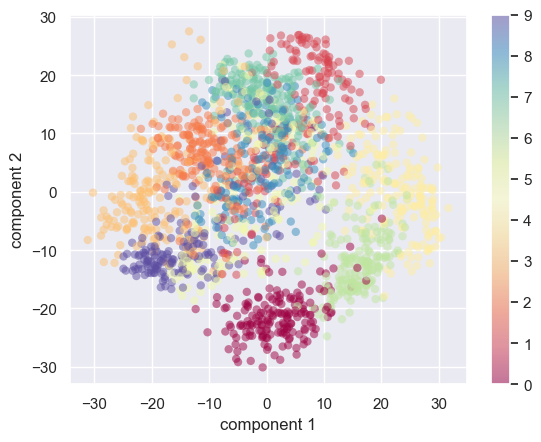

In [8]:
# lets visualized the digits data using the plt
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.colormaps.get_cmap('Spectral')
           )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

The PCA algorithm has constructed two directions (variables) which together explain most of the variance in our dataset. Then all our points our plotted in those two variables. Note that we did not use our labels in constructing these two new variables! We can already see some clear clusters in this 2 dimensional space. PCA clearly doesn't mis its effect!

##### Question 2: Make the PCA model for the amount of dimensions you proposed in Question 1. Create a train-test split and evaluate the model using random forest. Compare to our original decision trees model.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
X,y=digits.data, digits.target
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=42)
pca=PCA(n_components=0.95)

X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca,y_train)
y_pred_rf=rf_model.predict(X_test_pca)
accuracy_rf=accuracy_score(y_test,y_pred_rf)
print(f"Random Forest Accuracy with PCA: {accuracy_rf:.2f}")

dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)
y_pred_dt=dt_model.predict(X_test)
accuracy_dt=accuracy_score(y_test,y_pred_dt)
print(f"Decision Tree Accuracy on Original Data: {accuracy_dt:.2f}")

improvement = accuracy_rf-accuracy_dt
if improvement >0:
    print(f"Random Forest with PCA improved accuracy by {improvement:.2f}")
else:
    print(f"Decision Tree was better by {-improvement:.2f}")

Random Forest Accuracy with PCA: 0.97
Decision Tree Accuracy on Original Data: 0.86
Random Forest with PCA improved accuracy by 0.11


## 9.4 Exercises

##### Question 1: See section 9.3.2
##### Question 2: See section 9.3.2
##### Question 3: PCA works by trying to retain as much variance as possible in our dataset. Can you explain why this makes sense intuitively?
##### Question 4: PCA is often used for noise reduction. (Search: noise reduction digit dataset.) Can you explain why this would work?

#### Answer 3:

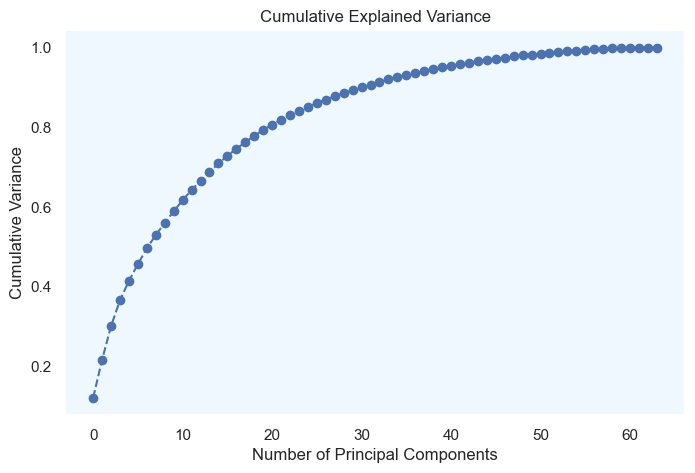

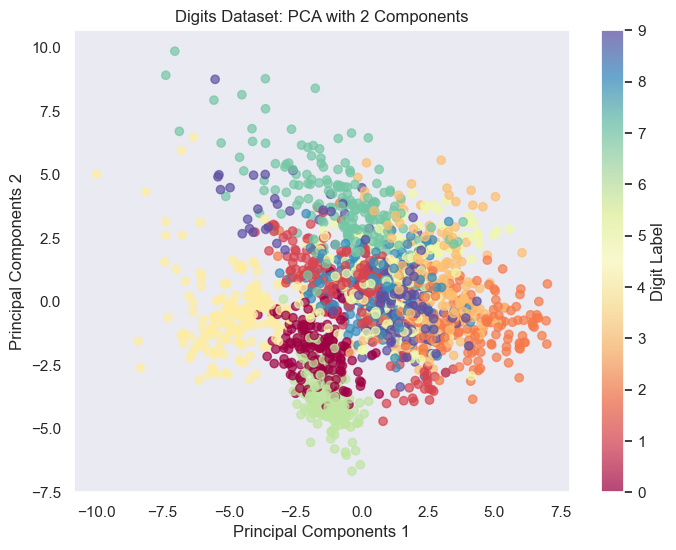

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
pca=PCA()
X_pca=pca.fit_transform(X_scaled)

# plot for explained variance ratio
plt.figure(figsize=(8,5))
ax1=plt.gca()
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o',linestyle='--')
ax1.set_facecolor('#f0f8ff')
plt.gcf().set_facecolor('#ffffff') 
plt.title("Cumulative Explained Variance")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.grid()
plt.show()
# try to principal components for visulization
pca_2d=PCA(n_components=2)
x_pca_2d=pca_2d.fit_transform(X_scaled)
# again lets plot this first 2 principal components
plt.figure(figsize=(8,6))
scatter=plt.scatter(x_pca_2d[:,0],x_pca_2d[:,1],c=y,cmap='Spectral',alpha=0.7)
plt.colorbar(scatter,label='Digit Label')
plt.title('Digits Dataset: PCA with 2 Components')
plt.xlabel('Principal Components 1')
plt.ylabel('Principal Components 2')
plt.grid()
plt.show()

#### Answer 4:

# Answer 3

### 1. varience represents information:
.In a dataset, variance measures how spread out the data points are. Features with high variance often carry more discriminative information, which helps machine learning models understand the relationships between data points.
.By retaining components with the highest variance, PCA ensures that the most "informative" parts of the data are preserved while discarding noise or less significant variations.

### 2. Dimensionality Reduction Without Major Loss:
.High-dimensional data often contains redundancies or correlations between features. PCA combines these correlated features into fewer components that explain the same variance, effectively reducing dimensions while keeping the essence of the data.
### Focus on the Signal, Not the Noise:
Low-variance features are more likely to contain noise rather than meaningful patterns. PCA ignores these features, improving the signal-to-noise ratio.
This results in a cleaner, more interpretable dataset for machine learning models.
### Better Performance for Models:
Models trained on lower-dimensional representations of the data (from PCA) often perform better because they focus on the most relevant features. This reduces the risk of overfitting, especially in cases where the original data has too many irrelevant or redundant dimensions.

# Answer 4

Dimensionality Reduction: PCA transforms the dataset into a new coordinate system defined by principal components, which are linear combinations of the original features. These components are ranked by how much variance (or information) they capture. Noise often manifests as small variations, which are captured by lower-variance components. By ignoring these components, PCA discards much of the noise while retaining the meaningful structure of the data​
GeeksforGeeks
​
Statistical Data Science Lab
.
For example, in digit datasets, PCA can reduce dimensions while maintaining the core structure of the digits, often using just 10–50 principal components to capture over 90% of the variance. This eliminates irrelevant variations without affecting the recognizable patterns that define each digit​ 